# PROJECT

# Travel Insurance Prediction :

# Aim Of Project: To predict the claim status (Yes/No) from the various travel insurance related attributes.


In [408]:
#LIBRARIES USED.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [409]:
#Reading the csv file with the help of pandas library
data=pd.read_csv(r"C:\Users\lenovo\Desktop\python data set\travel insurance.csv")
data

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [410]:
data.shape

(63326, 11)

In [411]:
data.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [412]:
data.describe(include="all")

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
count,63326,63326,63326,63326,63326,63326.000000,63326,63326.000000,63326.000000,18219,63326.000000
unique,16,2,2,26,2,NaN,149,NaN,NaN,2,NaN
top,EPX,Travel Agency,Online,Cancellation Plan,No,NaN,SINGAPORE,NaN,NaN,M,NaN
freq,35119,45869,62219,18630,62399,NaN,13255,NaN,NaN,9347,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.317074,NaN,40.702018,9.809992,NaN,39.969981
std,NaN,NaN,NaN,NaN,NaN,101.791566,NaN,48.845637,19.804388,NaN,14.017010
min,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,NaN,35.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.530000,0.000000,NaN,36.000000
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,NaN,43.000000


In [413]:
#Ascending starting 5 rows
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [414]:
#Decending last 5 rows
data.tail()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63
63325,JZI,Airlines,Online,Basic Plan,No,22,HONG KONG,26.0,9.10,F,35


In [415]:
#Accessing all columns of dataset
data.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [416]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [417]:
#Renaming columns
data=data.rename(columns={"Agency Type":"Agency_Type","Distribution Channel":"Distribution_Channel","Product Name":"Product_Name","Net Sales":"Net_Sales","Commision (in value)":"Commision"})

In [418]:
#finding the type of data
data.dtypes

Agency                   object
Agency_Type              object
Distribution_Channel     object
Product_Name             object
Claim                    object
Duration                  int64
Destination              object
Net_Sales               float64
Commision               float64
Gender                   object
Age                       int64
dtype: object

In [419]:
#To check missing value
data.isnull().sum()

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commision                   0
Gender                  45107
Age                         0
dtype: int64

# Data Cleaning

# Treating Missing Values

In [420]:
data.Gender.value_counts()

M    9347
F    8872
Name: Gender, dtype: int64

#Treating missing values with dropna()

In [421]:
data=data.drop(["Gender"],axis=1)

In [422]:
data.isnull().sum()

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Claim                   0
Duration                0
Destination             0
Net_Sales               0
Commision               0
Age                     0
dtype: int64

# Dtype Conversion

#Converting categorial value into numerical(using LableEncoder)

In [423]:
data.dtypes

Agency                   object
Agency_Type              object
Distribution_Channel     object
Product_Name             object
Claim                    object
Duration                  int64
Destination              object
Net_Sales               float64
Commision               float64
Age                       int64
dtype: object

In [424]:
data.Agency=le.fit_transform(data.Agency)
data.Agency_Type=le.fit_transform(data.Agency_Type)
data.Distribution_Channel=le.fit_transform(data.Distribution_Channel)
data.Product_Name=le.fit_transform(data.Product_Name)
data.Claim=le.fit_transform(data.Claim)
data.Destination=le.fit_transform(data.Destination)

In [425]:
data.dtypes

Agency                    int32
Agency_Type               int32
Distribution_Channel      int32
Product_Name              int32
Claim                     int32
Duration                  int64
Destination               int32
Net_Sales               float64
Commision               float64
Age                       int64
dtype: object

In [426]:
data.shape

(63326, 10)

# Building Base Model To Check Performance After Data Cleaning

# Data Splitting

In [76]:
data_y=data["Claim"]

In [77]:
data_x=data.drop(["Claim"],axis=1)

In [78]:
data_x.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age
0,3,1,0,12,186,79,-29.0,9.57,81
1,3,1,0,12,186,79,-29.0,9.57,71
2,6,1,1,16,65,4,-49.5,29.70,32
3,6,1,1,16,60,4,-39.6,23.76,32
4,6,1,1,16,79,61,-19.8,11.88,41


In [79]:
data_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int32

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=100)

In [82]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50660, 9), (12666, 9), (50660,), (12666,))

# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [84]:
lr.fit(x_train,y_train)

LogisticRegression()

In [85]:
lr_pred=lr.predict(x_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
m1=confusion_matrix(lr_pred,y_test)
m1

array([[12474,   191],
       [    1,     0]], dtype=int64)

In [87]:
lr_acc=m1.diagonal().sum()/m1.sum()*100
lr_acc

98.48413074372336

In [88]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12665
           1       0.00      0.00      0.00         1

    accuracy                           0.98     12666
   macro avg       0.50      0.49      0.50     12666
weighted avg       1.00      0.98      0.99     12666



In [89]:
#Logistic Regression
#confusion matrix is not good.

# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [91]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
dt_pred=dt.predict(x_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
m2=confusion_matrix(dt_pred,y_test)
m2

array([[12291,   178],
       [  184,    13]], dtype=int64)

In [94]:
dt_acc=m2.diagonal().sum()/m2.sum()*100
dt_acc

97.14195483972841

In [95]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12469
           1       0.07      0.07      0.07       197

    accuracy                           0.97     12666
   macro avg       0.53      0.53      0.53     12666
weighted avg       0.97      0.97      0.97     12666



In [96]:
#Decision Tree
#confusion Matrix is not good.

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [98]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
rf_pred=rf.predict(x_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
m3=confusion_matrix(rf_pred,y_test)
m3

array([[12444,   187],
       [   31,     4]], dtype=int64)

In [101]:
rf_acc=m3.diagonal().sum()/m3.sum()*100
rf_acc

98.27885678193589

In [102]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12631
           1       0.02      0.11      0.04        35

    accuracy                           0.98     12666
   macro avg       0.51      0.55      0.51     12666
weighted avg       0.99      0.98      0.99     12666



In [103]:
#Random Forest
#confusion matrix is not good.

# AdaBoost

In [104]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
ad=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [106]:
ad.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [107]:
ad_pred=ad.predict(x_test)
ad_pred

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
m4=confusion_matrix(ad_pred,y_test)
m4

array([[12393,   185],
       [   82,     6]], dtype=int64)

In [109]:
ad_acc=m4.diagonal().sum()/m4.sum()*100
ad_acc

97.8919943154903

In [110]:
print(classification_report(ad_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12578
           1       0.03      0.07      0.04        88

    accuracy                           0.98     12666
   macro avg       0.51      0.53      0.52     12666
weighted avg       0.99      0.98      0.98     12666



In [111]:
#AdaBoost
#confusion matrix is not good.

# XG Boost

In [112]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [113]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [114]:
xg_pred=xg.predict(x_test)
xg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
m5=confusion_matrix(xg_pred,y_test)
m5

array([[12469,   191],
       [    6,     0]], dtype=int64)

In [116]:
xg_acc=m5.diagonal().sum()/m5.sum()*100
xg_acc

98.44465498184115

In [117]:
print(classification_report(xg_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12660
           1       0.00      0.00      0.00         6

    accuracy                           0.98     12666
   macro avg       0.50      0.49      0.50     12666
weighted avg       1.00      0.98      0.99     12666



In [118]:
#XG Boost
#confusion matrix is not good.

# KNN

In [119]:
from sklearn.neighbors import KNeighborsClassifier
Kn=KNeighborsClassifier(n_neighbors=40)

In [120]:
Kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [121]:
Kn_pred=Kn.predict(x_test)
Kn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
m6=confusion_matrix(Kn_pred,y_test)
m6

array([[12475,   191],
       [    0,     0]], dtype=int64)

In [123]:
acc_Kn=m6.diagonal().sum()/m6.sum()*100
acc_Kn

98.4920258960998

In [124]:
print(classification_report(Kn_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12666
           1       0.00      0.00      0.00         0

    accuracy                           0.98     12666
   macro avg       0.50      0.49      0.50     12666
weighted avg       1.00      0.98      0.99     12666



In [125]:
l=list()

In [226]:
for i in range(1,100):
    Kn=KNeighborsClassifier(n_neighbors=i)
    Kn.fit(x_train,y_train)
    Kn_pred=Kn.predict(x_test)
    c=confusion_matrix(Kn_pred,y_test)
    acc=c.diagonal().sum()/c.sum()*100
    l.append(acc)

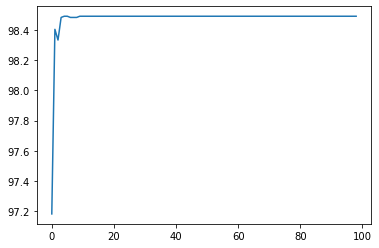

In [228]:
p=plt.plot(l)

In [229]:
#KNN
#confusion matrix is not good.

# SVM

In [76]:
from sklearn.svm import SVC
svc=SVC()

In [77]:
svc.fit(x_train,y_train)

SVC()

In [78]:
svc_pred=svc.predict(x_test)
svc_pred

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
m7=confusion_matrix(svc_pred,y_test)
m7

array([[12475,   191],
       [    0,     0]], dtype=int64)

In [80]:
acc_svc=m7.diagonal().sum()/m7.sum()*100
acc_svc

98.4920258960998

In [81]:
print(classification_report(svc_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     12666
           1       0.00      0.00      0.00         0

    accuracy                           0.98     12666
   macro avg       0.50      0.49      0.50     12666
weighted avg       1.00      0.98      0.99     12666



In [230]:
#SVM
#confusion matrix is not good.

# To Check The Balance-Imbalance Condition

#Target Column

In [126]:
#Class distrubution
data.Claim.value_counts()

0    62399
1      927
Name: Claim, dtype: int64

<AxesSubplot:>

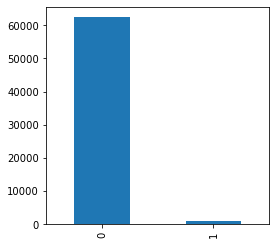

In [127]:
#Plotting a bar chat to display the class distribution
data.Claim.value_counts().plot.bar(figsize=(4,4))

<AxesSubplot:xlabel='Claim', ylabel='count'>

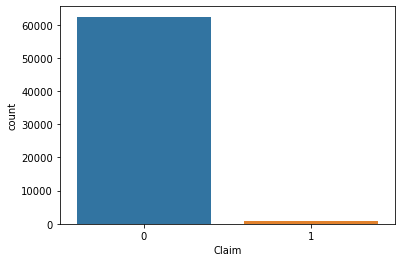

In [128]:
#plotting a count plot to display the class distribution
sns.countplot("Claim",data=data)

# The data having class imbalance problem so I have to use class imbalance technique

# Class Imbalance Technique

# Synthetic Minority Oversampling Technique (SMOTE)

In [427]:
data.Claim.value_counts()

0    62399
1      927
Name: Claim, dtype: int64

In [428]:
data_y=data["Claim"]

In [429]:
data_x=data.drop(["Claim"],axis=1)

In [430]:
data_x.shape

(63326, 9)

In [431]:
data_y.shape

(63326,)

In [432]:
from imblearn.over_sampling import SMOTE

In [433]:
sm=SMOTE()

In [434]:
x_smote,y_smote=sm.fit_resample(data_x,data_y)

In [435]:
x_smote.shape,y_smote.shape

((124798, 9), (124798,))

In [436]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)

In [437]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((99838, 9), (24960, 9), (99838,), (24960,))

In [438]:
x_smote.shape

(124798, 9)

In [439]:
y_smote.shape

(124798,)

In [440]:
y_smote.value_counts()   #balance

0    62399
1    62399
Name: Claim, dtype: int64

<AxesSubplot:>

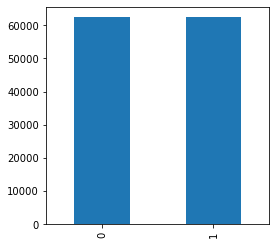

In [441]:
y_smote.value_counts().plot.bar(figsize=(4,4))

#Now our target column is balance.

# Exploratory Data Analysis (EDA)

# Correlation Plot

In [442]:
#correlation plot
cr=x_smote.corr()
cr

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age
Agency,1.000000,0.597314,-0.155293,0.050433,-0.225710,-0.396299,-0.339846,-0.192885,0.138355
Agency_Type,0.597314,1.000000,-0.067762,-0.192685,-0.242779,-0.366683,-0.293862,-0.212107,-0.077222
Distribution_Channel,-0.155293,-0.067762,1.000000,-0.105989,-0.007628,0.025448,0.046716,0.048374,-0.221282
Product_Name,0.050433,-0.192685,-0.105989,1.000000,-0.260785,-0.045960,-0.213681,0.059419,0.176961
Duration,-0.225710,-0.242779,-0.007628,-0.260785,1.000000,0.185175,0.756342,0.626409,-0.012446
Destination,-0.396299,-0.366683,0.025448,-0.045960,0.185175,1.000000,0.202114,0.118434,-0.077376
Net_Sales,-0.339846,-0.293862,0.046716,-0.213681,0.756342,0.202114,1.000000,0.812159,0.012188
Commision,-0.192885,-0.212107,0.048374,0.059419,0.626409,0.118434,0.812159,1.000000,0.049416
Age,0.138355,-0.077222,-0.221282,0.176961,-0.012446,-0.077376,0.012188,0.049416,1.000000


# Heatmap

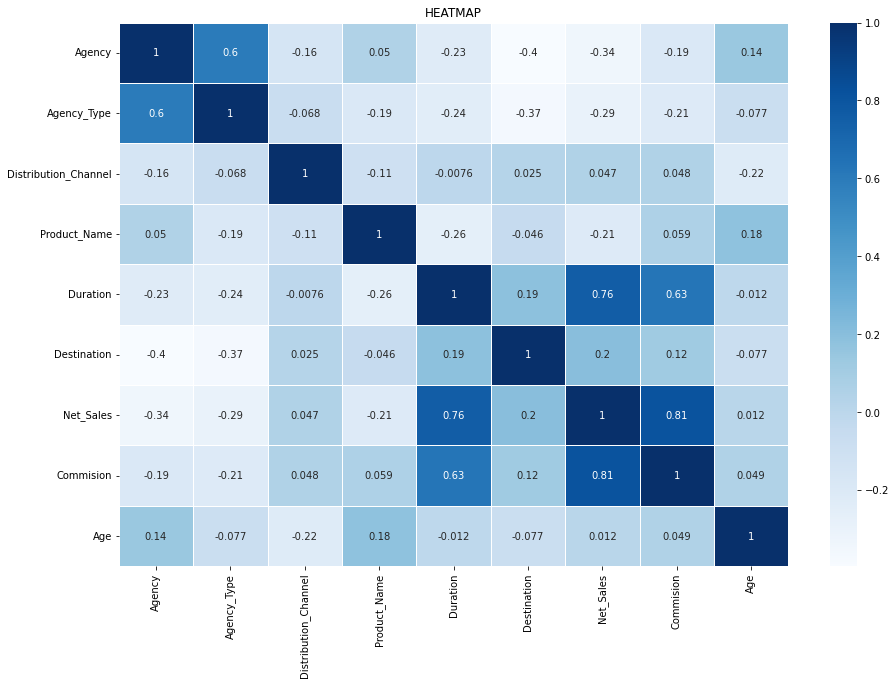

In [443]:
plt.figure(figsize=(15,10))
hearmap=sns.heatmap(cr,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("HEATMAP")
plt.show()


# Outlier Treatment

<AxesSubplot:>

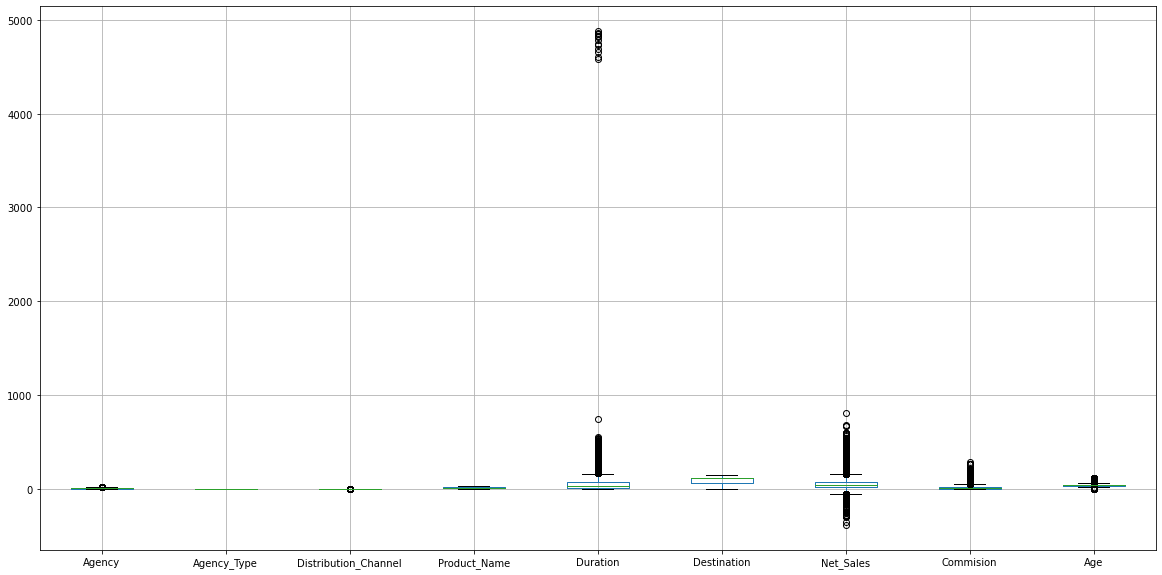

In [444]:
x_smote.boxplot(figsize=(20,10))

#FROM ABOVE BOXPLOT, "Duration","Net_Sales","Commision","Age" THIS ALL HAVING OUTLIERS AND ALL FEATURES ARE NUMERIC.SO I GO FOR OUTLIER TREATMENT.

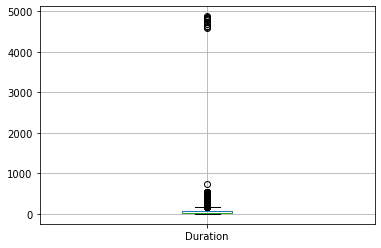

In [445]:
#boxplot
box=x_smote.boxplot(column="Duration")

<AxesSubplot:>

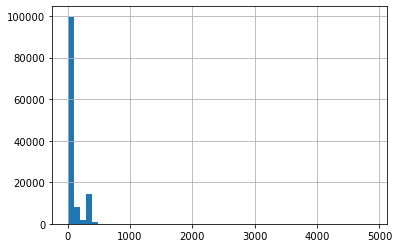

In [446]:
x_smote.Duration.hist(bins=50)

In [447]:
x_smote.Duration.describe()

count    124798.000000
mean         79.229266
std         126.530353
min          -2.000000
25%          12.000000
50%          28.000000
75%          72.000000
max        4881.000000
Name: Duration, dtype: float64

<AxesSubplot:xlabel='Duration', ylabel='Density'>

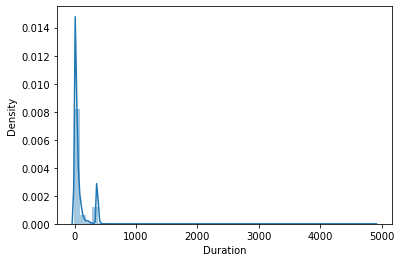

In [448]:
sns.distplot(x_smote["Duration"])

#data is skewed one so go with iqr method.

In [449]:
iqr1=x_smote.Duration.quantile(0.75)-x_smote.Duration.quantile(0.25)
iqr1

60.0

In [450]:
u1=x_smote["Duration"].quantile(0.75)+3*iqr1
l1=x_smote["Duration"].quantile(0.25)-3*iqr1
print(u1,l1)

252.0 -168.0


In [451]:
x_smote.loc[x_smote["Duration"]>252.0,"Duration"]=252.0

<AxesSubplot:>

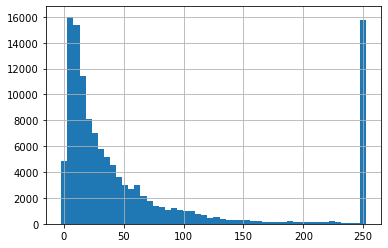

In [452]:
x_smote.Duration.hist(bins=50)

<AxesSubplot:xlabel='Duration', ylabel='Density'>

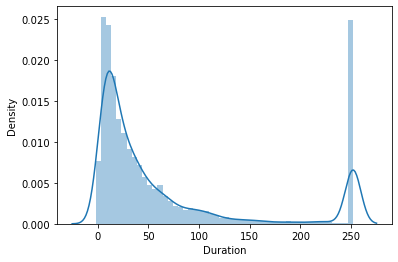

In [453]:
sns.distplot(x_smote["Duration"])

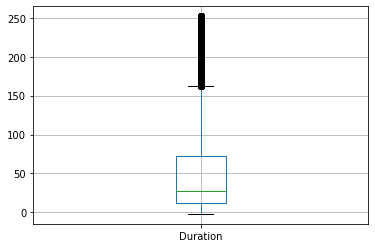

In [454]:
box=x_smote.boxplot(column="Duration")

#outlier treatment for column "net_sales"

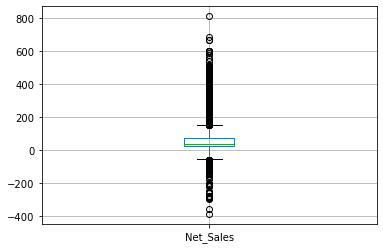

In [455]:
#boxplot
box=x_smote.boxplot(column="Net_Sales")

<AxesSubplot:>

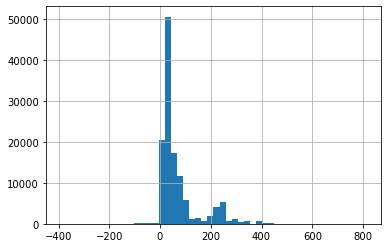

In [456]:
x_smote.Net_Sales.hist(bins=50)

In [457]:
x_smote.Net_Sales.describe()

count    124798.000000
mean         66.999659
std          78.143347
min        -389.000000
25%          20.822597
50%          36.000000
75%          73.909807
max         810.000000
Name: Net_Sales, dtype: float64

<AxesSubplot:xlabel='Net_Sales', ylabel='Density'>

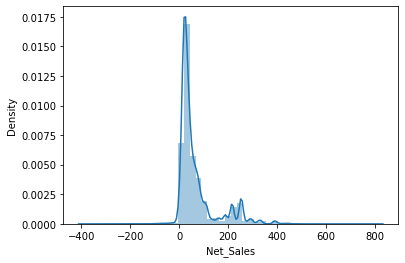

In [458]:
sns.distplot(x_smote["Net_Sales"])

#data is skewed one so go with iqr method.

In [459]:
iqr2=x_smote.Net_Sales.quantile(0.75)-x_smote.Net_Sales.quantile(0.25)
iqr2

53.087209740802635

In [460]:
u2=x_smote["Duration"].quantile(0.75)+3*iqr2
l2=x_smote["Duration"].quantile(0.25)-3*iqr2
print(u2,l2)

231.26162922240792 -147.26162922240792


In [461]:
x_smote.loc[x_smote["Net_Sales"]>231,"Net_Sales"]=231

<AxesSubplot:>

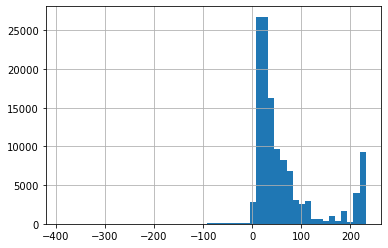

In [462]:
x_smote.Net_Sales.hist(bins=50)

<AxesSubplot:xlabel='Net_Sales', ylabel='Density'>

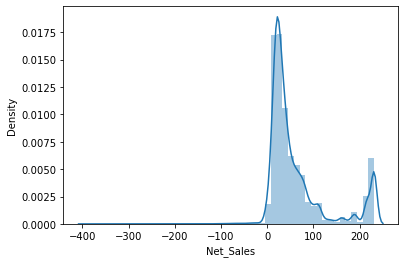

In [463]:
sns.distplot(x_smote["Net_Sales"])

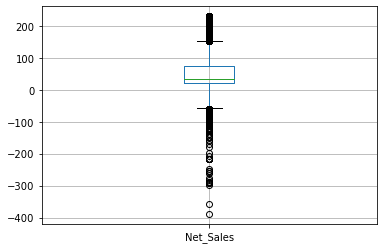

In [464]:
box=x_smote.boxplot(column="Net_Sales")

#outlier treatment fot column "Commision"

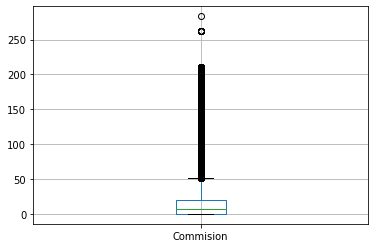

In [465]:
#boxplot
box=x_smote.boxplot(column=["Commision"])

<AxesSubplot:>

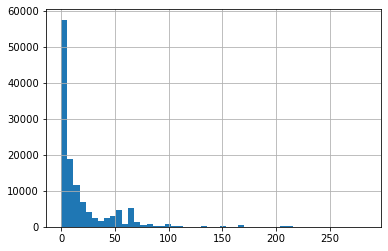

In [466]:
x_smote.Commision.hist(bins=50)

In [467]:
x_smote.Commision.describe()

count    124798.000000
mean         17.565014
std          27.611677
min           0.000000
25%           0.000000
50%           6.570194
75%          20.659298
max         283.500000
Name: Commision, dtype: float64

<AxesSubplot:xlabel='Commision', ylabel='Density'>

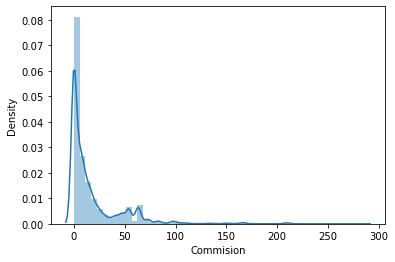

In [468]:
sns.distplot(x_smote["Commision"])

#data is skewed one so go with iqr method.

In [469]:
iqr3=x_smote.Commision.quantile(0.75)-x_smote.Commision.quantile(0.25)
iqr3

20.65929758213119

In [470]:
u3=x_smote["Commision"].quantile(0.75)+3*iqr3
l3=x_smote["Commision"].quantile(0.25)-3*iqr3
print(u3,l3)

82.63719032852477 -61.97789274639358


In [471]:
x_smote.loc[x_smote["Commision"]>82,"Commision"]=82

<AxesSubplot:>

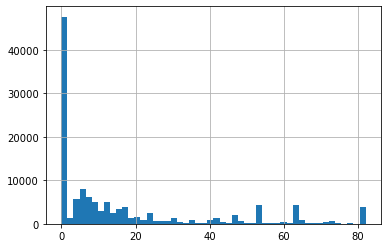

In [472]:
x_smote.Commision.hist(bins=50)

<AxesSubplot:xlabel='Commision', ylabel='Density'>

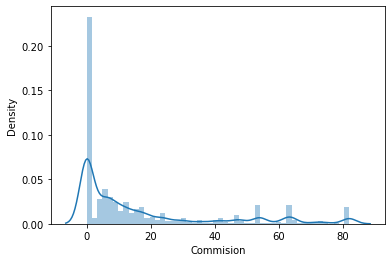

In [473]:
sns.distplot(x_smote["Commision"])

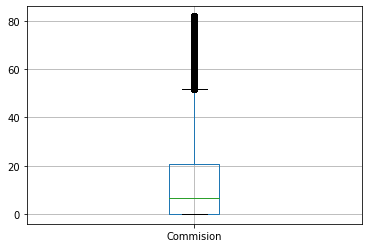

In [474]:
box=x_smote.boxplot(column=["Commision"])

#outlier treatment fot column "Age"

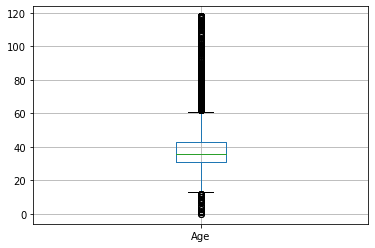

In [475]:
#boxplot
box=x_smote.boxplot(column=["Age"])

In [476]:
x_smote.Age.describe()

count    124798.000000
mean         38.897683
std          13.577424
min           0.000000
25%          31.000000
50%          36.000000
75%          43.000000
max         118.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

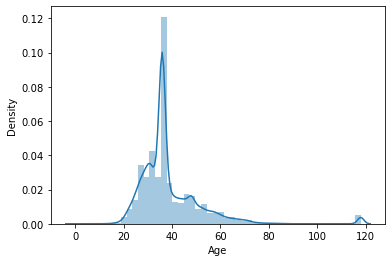

In [477]:
sns.distplot(x_smote["Age"])

#data is skewed one so with iqr method.

In [478]:
iqr4=x_smote.Age.quantile(0.75)-x_smote.Age.quantile(0.25)
iqr4

12.0

In [479]:
u4=x_smote["Age"].quantile(0.75)+3*iqr4
l4=x_smote["Age"].quantile(0.25)-3*iqr4
print(u4,l4)

79.0 -5.0


In [480]:
x_smote.loc[x_smote["Age"]>79.0,"Age"]=79.0

<AxesSubplot:>

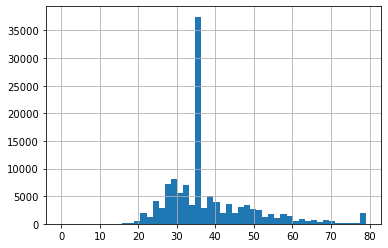

In [481]:
x_smote.Age.hist(bins=50)

<AxesSubplot:xlabel='Age', ylabel='Density'>

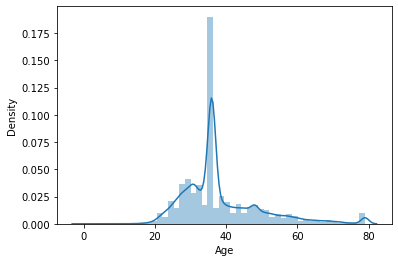

In [482]:
sns.distplot(x_smote["Age"])

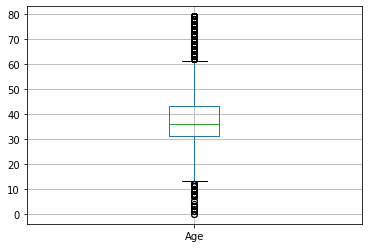

In [483]:
box=x_smote.boxplot(column=["Age"])

# Skewness Treatment

In [484]:
x_smote.skew()

Agency                  0.215292
Agency_Type            -0.065132
Distribution_Channel   -6.518226
Product_Name            0.378937
Duration                1.586168
Destination            -0.857021
Net_Sales               1.540041
Commision               1.526389
Age                     1.372226
dtype: float64

#We need to do skewness treatment for columns "Duration" ,"Net_Sales" ,"Commision" and "Age".Because their skewness are not in range of 1 to -1 .

# SKEWNESS TREATMENT BY CUBE ROOT TRANSFORMATION

#skewness treatment for column "Duration"

In [485]:
x_smote["Duration"].skew()

1.5861677471790723

In [486]:
x_smote["Duration"]=np.cbrt(x_smote["Duration"])

In [487]:
x_smote["Duration"].skew()

0.76370776647996

#skewness treatment foe column "Commision"

In [488]:
x_smote["Commision"].skew()

1.5263890723392888

In [489]:
x_smote["Commision"]=np.cbrt(x_smote["Commision"])

In [490]:
x_smote["Commision"].skew()

0.1490363922349858

#skewness treatment for column "Age"

In [491]:
x_smote["Age"].skew()

1.372226116641579

In [492]:
x_smote["Age"]=np.cbrt(x_smote["Age"])

In [493]:
x_smote["Age"].skew()

0.7188520467820176

#skewness treatment for column "Net_Sales"

In [494]:
x_smote["Net_Sales"].skew()

1.5400406886093927

In [495]:
x_smote["Net_Sales"]=np.cbrt(x_smote["Net_Sales"])

In [496]:
x_smote["Net_Sales"].skew()

-0.5245902633223879

In [497]:
x_smote.skew()

Agency                  0.215292
Agency_Type            -0.065132
Distribution_Channel   -6.518226
Product_Name            0.378937
Duration                0.763708
Destination            -0.857021
Net_Sales              -0.524590
Commision               0.149036
Age                     0.718852
dtype: float64

#I had created a model on data after the class imbalance technique and outlier 7 skewness treatment.But I didn'nt get better model.So I go with feature selection technique.

# Feature Selection Technique.

# RFE (Recursive Feature Elimination)

In [498]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [499]:
dt=DecisionTreeClassifier()

In [500]:
rfe=RFE(dt)

In [501]:
rfe.fit(x1_train,y1_train)

RFE(estimator=DecisionTreeClassifier())

In [502]:
rfe.support_

array([ True, False, False,  True,  True, False,  True, False, False])

In [503]:
data_new=pd.DataFrame({"feature support":list(rfe.support_),"columns":list(x_smote.iloc[:,0:9].columns)})

In [504]:
data_new

,feature support,columns
0,True,Agency
1,False,Agency_Type
2,False,Distribution_Channel
3,True,Product_Name
4,True,Duration
5,False,Destination
6,True,Net_Sales
7,False,Commision
8,False,Age


In [505]:
data_new1=data_new.sort_values("feature support",ascending=False)

In [506]:
data_new1

,feature support,columns
0,True,Agency
3,True,Product_Name
4,True,Duration
6,True,Net_Sales
1,False,Agency_Type
2,False,Distribution_Channel
5,False,Destination
7,False,Commision
8,False,Age


#According to feature Selection Technique, I drop the unneceessary columns

In [507]:
x_smote=x_smote.drop(["Agency_Type","Distribution_Channel","Destination","Commision","Age"],axis=1)

In [508]:
x_smote.head()

,Agency,Product_Name,Duration,Net_Sales
0,3,12,5.708267,-3.072317
1,3,12,5.708267,-3.072317
2,6,16,4.020726,-3.671710
3,6,16,3.914868,-3.408514
4,6,16,4.290840,-2.705339


In [509]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: Claim, dtype: int32

In [510]:
y_smote.value_counts()  #balance

0    62399
1    62399
Name: Claim, dtype: int64

In [511]:
x_smote.shape

(124798, 4)

In [512]:
y_smote.shape

(124798,)

# To Build Model On Data To Check Performance After The class Imbalance Technique,outlier Treatment & Feature Selection Technique(RFE)

# Splliting Data 

In [513]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=100)

In [514]:
x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

((99838, 4), (24960, 4), (99838,), (24960,))

# Logistic Regression

In [515]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [516]:
lr.fit(x2_train,y2_train)

LogisticRegression()

In [517]:
lr_pred2=lr.predict(x2_test)
lr_pred2

array([1, 0, 0, ..., 0, 0, 1])

In [518]:
m8=confusion_matrix(lr_pred2,y2_test)
m8

array([[9862, 3549],
       [2689, 8860]], dtype=int64)

In [519]:
acc_lr2=m8.diagonal().sum()/m8.sum()*100
acc_lr2

75.00801282051283

In [520]:
print(classification_report(lr_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     13411
           1       0.71      0.77      0.74     11549

    accuracy                           0.75     24960
   macro avg       0.75      0.75      0.75     24960
weighted avg       0.75      0.75      0.75     24960



In [521]:
#Logistic Regression
#confusion matrix is good.
#accuracy is not good.
#precision,recall are not good.

# AUC_ROC curve for Logistic Regression

In [550]:
roc_lr=roc_auc_score(lr_pred2,y2_test)
roc_lr

0.7512662392959402

In [551]:
pred_valuelr=lr.predict_proba(x2_test)
pred_valuelr

array([[0.19747388, 0.80252612],
       [0.56647669, 0.43352331],
       [0.71291272, 0.28708728],
       ...,
       [0.60424104, 0.39575896],
       [0.95016366, 0.04983634],
       [0.27349909, 0.72650091]])

In [552]:
df_roclr=pd.DataFrame(pred_valuelr)
df_roclr

,0,1
0,0.197474,0.802526
1,0.566477,0.433523
2,0.712913,0.287087
3,0.651437,0.348563
4,0.417665,0.582335
...,...,...
24955,0.715502,0.284498
24956,0.864425,0.135575
24957,0.604241,0.395759
24958,0.950164,0.049836


In [553]:
fpr_lr,tpr_lr,threshold=roc_curve(y2_test,df_roclr.iloc[:,1])

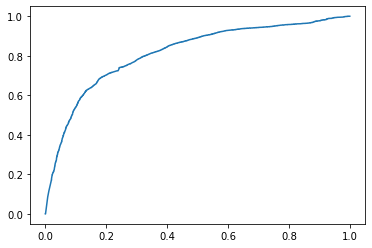

In [554]:
plt.plot(fpr_lr,tpr_lr)

# Decision Tree

In [522]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [523]:
dt.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [524]:
dt_pred2=dt.predict(x2_test)
dt_pred2

array([1, 0, 0, ..., 1, 0, 1])

In [525]:
m9=confusion_matrix(dt_pred2,y2_test)
m9

array([[11779,   681],
       [  772, 11728]], dtype=int64)

In [526]:
acc_dt2=m9.diagonal().sum()/m9.sum()*100
acc_dt2

94.1786858974359

In [527]:
print(classification_report(dt_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12460
           1       0.95      0.94      0.94     12500

    accuracy                           0.94     24960
   macro avg       0.94      0.94      0.94     24960
weighted avg       0.94      0.94      0.94     24960



In [214]:
#Decision Tree
#confusion matrix is  good.
#accuracy is  good.
#precision and recall are  good.

# AUC_ROC curve for Decision Tree

In [555]:
roc_dt=roc_auc_score(dt_pred2,y2_test)
roc_dt

0.9417925521669341

In [556]:
pred_valuedt=dt.predict_proba(x2_test)
pred_valuedt

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [557]:
df_rocdt=pd.DataFrame(pred_valuedt)
df_rocdt

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
24955,0.0,1.0
24956,0.0,1.0
24957,0.0,1.0
24958,1.0,0.0


In [558]:
fpr_dt,tpr_dt,threshold=roc_curve(y2_test,df_rocdt.iloc[:,1])

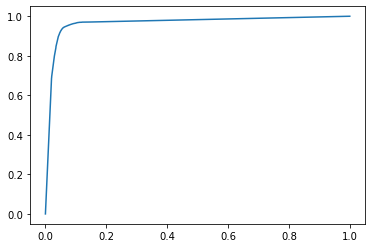

In [559]:
plt.plot(fpr_dt,tpr_dt)

# Random Forest

In [528]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [529]:
rf.fit(x2_train,y2_train)

RandomForestClassifier()

In [530]:
rf_pred2=rf.predict(x2_test)
rf_pred2

array([1, 0, 0, ..., 1, 0, 1])

In [531]:
m10=confusion_matrix(rf_pred2,y2_test)
m10

array([[11658,   697],
       [  893, 11712]], dtype=int64)

In [532]:
acc_rf2=m10.diagonal().sum()/m10.sum()*100
acc_rf2

93.6298076923077

In [533]:
print(classification_report(rf_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     12355
           1       0.94      0.93      0.94     12605

    accuracy                           0.94     24960
   macro avg       0.94      0.94      0.94     24960
weighted avg       0.94      0.94      0.94     24960



In [534]:
#Random Forest
#Confusion matricx is not good.

# AdaBoost

In [535]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [536]:
ad=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [537]:
ad.fit(x2_train,y2_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [538]:
ad_pred2=ad.predict(x2_test)
ad_pred2

array([1, 0, 0, ..., 1, 0, 1])

In [539]:
m11=confusion_matrix(ad_pred2,y2_test)
m11

array([[11746,   650],
       [  805, 11759]], dtype=int64)

In [540]:
acc_ad2=m11.diagonal().sum()/m11.sum()*100
acc_ad2

94.17067307692307

In [541]:
print(classification_report(ad_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12396
           1       0.95      0.94      0.94     12564

    accuracy                           0.94     24960
   macro avg       0.94      0.94      0.94     24960
weighted avg       0.94      0.94      0.94     24960



In [542]:
#Adaboost
#Confusion matrix is not good.

# XG Boost

In [543]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [544]:
xg.fit(x2_train,y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [545]:
xg_pred2=xg.predict(x2_test)
xg_pred2

array([1, 0, 0, ..., 0, 0, 1])

In [546]:
m12=confusion_matrix(xg_pred2,y2_test)
m12

array([[11513,   559],
       [ 1038, 11850]], dtype=int64)

In [547]:
acc_xg2=m12.diagonal().sum()/m12.sum()*100
acc_xg2

93.60176282051282

In [548]:
print(classification_report(xg_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     12072
           1       0.95      0.92      0.94     12888

    accuracy                           0.94     24960
   macro avg       0.94      0.94      0.94     24960
weighted avg       0.94      0.94      0.94     24960



In [549]:
#XG Boost
#confusion matrix is not good.

#checking performance using AUCROC curves.

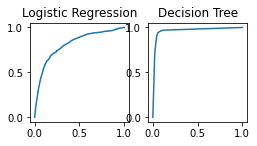

In [560]:
#subplot
plt.subplot(2,3,1)
plt.plot(fpr_lr,tpr_lr)
plt.title("Logistic Regression")

plt.subplot(2,3,2)
plt.plot(fpr_dt,tpr_dt)
plt.title("Decision Tree")

plt.show()

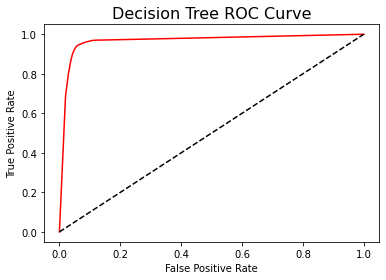

In [561]:
plt.plot(fpr_dt,tpr_dt,color="red")
plt.plot([0,1],[0,1],'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve',fontsize=16)
plt.show();

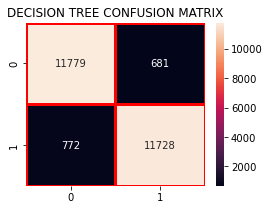

In [562]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(dt_pred2,y2_test),
                annot=True,fmt = "d",linecolor="r",linewidths=3)
    
plt.title("DECISION TREE CONFUSION MATRIX",fontsize=12)
plt.show()

# CONCLUSION : Decision Tree algorithm gives better model for my dataset having accuracy 94.17